In [1]:
library("ggplot2")
library("RColorBrewer")

library('DESeq2')

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min


Attaching package: ‘S4Vectors’

The following objects are maske

## My data

In [2]:
getwd()

[1] "/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis"

In [1]:
mouse = read.csv('../corr_exp_mouse.csv',row.names=1,check.names=FALSE)
human = read.csv('../corr_exp_human.csv',row.names=1,check.names=FALSE)

human_raw = read.csv('../tcga_lihc_rawcounts.csv',row.names=1,check.names=FALSE)

In [2]:
head(human_raw)

,a3a3,a7ig,a3jl,a2kb,a4xi,a7m7,a5sl,4072,a7ii,5264,⋯,a627,a73e,a7k7,a75c,a2ka,a6m4,a6m3,a3a9,a25t,a2hs
A1CF,2449,1078,1700,4094,3401,2653,4530,0,1154,8004,⋯,1474,1804,1741,1987,1487,5949,1079,833,671,1334
AAAS,827,2364,1080,2009,1052,978,1545,0,3952,2677,⋯,1155,2347,1908,2044,1859,1562,2105,1539,2570,1054
AACS,569,955,833,329,481,695,390,0,1425,1738,⋯,584,1709,857,593,758,332,699,378,7016,113
AADAC,4214,1955,7152,21498,19484,8139,55843,0,41,2870,⋯,10925,31190,10291,7487,8414,13939,2141,6700,1906,16701
AADAT,17,38,36,78,462,88,364,0,124,132,⋯,723,134,38,166,139,172,61,8,162,272
AAED1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
dim(human_raw)

[1] 9175  183

In [5]:
myClust = read.csv('../human_mouseClust.csv',check.names=FALSE)

In [6]:
colnames(myClust) = c('PID','condition')

In [7]:
head(myClust)

PID,condition
a114,0
a4xi,1
a3m9,0
a3ma,0
a10x,1
a112,0


In [8]:
human_srt <- human_raw[,order(names(human_raw))]

human_srt_n = as.data.frame(sapply(human_srt, as.integer))

rownames(human_srt_n) <- rownames(human_srt)

In [14]:
myClust_srt <- myClust[order(myClust$PID),]
myClust_srt_n <- as.data.frame(sapply(myClust, as.numeric))
rownames(myClust_srt_n) <- myClust_srt$PID

In [9]:
indir='/cellar/users/mdow/Projects/HCC/RNA_analysis/'
exp_indir = paste(indir,'tcga_all_rawcounts.csv',sep='')
exp_df = read.csv(exp_indir,check.names=FALSE,row.names=1)
print(dim(exp_df))

#exp_df_n = as.data.frame(sapply(exp_df, as.integer))

exp_df_n = as.data.frame(sapply(exp_df, as.integer))

rownames(exp_df_n) <- rownames(exp_df)

head(exp_df_n)

[1] 9175  236


,4072,4073,5258,5260,5261,5262,5263,5264,a10q_n,a10r,⋯,a7mf,a7px,a7py,a7pz,a7s9,a7sb,a7sf,a7sk,a7xp,a82e
a1cf,0,0,9031,146,1296,1886,5404,8004,2969,3642,⋯,1355,688,2115,2901,1306,2958,2417,2531,4627,7
aaas,0,0,2054,1100,894,1203,1936,2677,670,1100,⋯,2111,2271,844,4517,1381,1516,1070,1795,1176,1844
aacs,0,0,3308,1828,779,720,1713,1738,166,833,⋯,2158,2649,161,493,893,246,268,398,794,1767
aadac,0,0,5014,22,5842,16538,5372,2870,12209,44042,⋯,3210,909,4669,4501,6216,24838,5274,12267,18380,16
aadat,0,0,190,57,85,281,120,132,1769,11,⋯,113,88,6,183,80,576,75,157,89,57
aaed1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
tmp = read.csv("/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis/human/Hoshida_C3_vs_normal.csv",check.names=FALSE,row.names=1)

## Compare two conditions at once 
### 1vs2, 1vs3, 2vs3

In [15]:
for (i in c(0,1,2)){
    print(dim(myClust_srt[which(myClust_srt$condition == i),]))
}

[1] 87  2
[1] 65  2
[1] 31  2


In [16]:
cond12 = myClust_srt[which(myClust_srt$condition == 0|myClust_srt$condition == 1),]
cond13 = myClust_srt[which(myClust_srt$condition == 0|myClust_srt$condition == 2),]
cond23 = myClust_srt[which(myClust_srt$condition == 1|myClust_srt$condition == 2),]
c(dim(cond12),dim(cond13),dim(cond23))

[1] 152   2 118   2  96   2

In [17]:
dim(human_raw[cond12$PID])

[1] 9175  152

In [18]:
df12 = human_srt_n[cond12$PID]
df13 = human_srt_n[cond13$PID]
df23 = human_srt_n[cond23$PID]
c(dim(df12),dim(df13),dim(df23))

[1] 9175  152 9175  118 9175   96

In [11]:
run_deseq <- function(exp_df,cond_df,fname){
    print(fname)
    
    exp_df_n = as.data.frame(sapply(exp_df, as.integer))
    rownames(exp_df_n)<- rownames(exp_df)
    
    dds <- DESeqDataSetFromMatrix(countData = exp_df_n, colData = cond_df, design = ~ condition)
    # Eliminate rows with low expression and columns with all 0s
    x = 10
    dds <- dds[rowSums(counts(dds)) > x, colSums(counts(dds)) > 0]
    
    cts <- counts(dds)
    geoMeans <- apply(cts, 1, function(row) if (all(row == 0)) 0 else exp(mean(log(row[row != 0]))))
    dds <- estimateSizeFactors(dds, geoMeans=geoMeans)

    dds <- DESeq(dds)
    
    res <- results(dds)
    write.csv(as.data.frame(res), file=fname)

    return(dds)
}

In [12]:
plot_results <- function(dds){
    res <- results(dds)
    # Plot 1
    summary(res)
    plotMA(res, main="DESeq2", ylim=c(-2,2))
    
    # Plot 2 p < 0.05
    res05 <- results(dds, alpha=0.05)
    plotMA(res05, main="alpha=0.05", ylim=c(-2,2))
    
    rld <- rlog(dds) 
    vsd <- varianceStabilizingTransformation(dds)
    data <- plotPCA(rld, intgroup="condition", returnData=TRUE) 

    percentVar <- round(100 * attr(data, "percentVar")) 
    ggplot(data, aes(PC1, PC2, color=condition)) + geom_point(size=3) + xlab(paste0("PC1: ",percentVar[1],"% variance")) 
        ylab(paste0("PC2: ",percentVar[2],"% variance"))

}

##  One vs all others

In [21]:
test = myClust

test$condition1 = test$condition
test$condition2 = test$condition
test$condition3 = test$condition

In [22]:
test$condition1[test$condition != 0] <- 1 # change 1 and 2 to 1
test$condition2[test$condition != 1] <- 0 # change 2 and 0 to 0
test$condition3[test$condition != 2] <- 0 # change 1 and 0 to 0

In [23]:
run_deseq_1vsAll <- function(exp_df,cond_df,cond_col,fname){
    print(fname)
    exp_df_n = as.data.frame(sapply(exp_df, as.numeric))
    rownames(exp_df_n)<- rownames(exp_df)
    
    dds <- DESeqDataSetFromMatrix(countData = exp_df_n, colData = cond_df, design = ~ cond_col)
    # Eliminate rows with low expression and columns with all 0s
    x = 10
    dds <- dds[rowSums(counts(dds)) > x, colSums(counts(dds)) > 0]
    
    cts <- counts(dds)
    geoMeans <- apply(cts, 1, function(row) if (all(row == 0)) 0 else exp(mean(log(row[row != 0]))))
    dds <- estimateSizeFactors(dds, geoMeans=geoMeans)

    dds <- DESeq(dds)
    
    res <- results(dds)
    write.csv(as.data.frame(res), file=fname)

    return(dds)
}

In [55]:
#dd_12 <- run_deseq_1vsAll(human_srt_n,test,'condition1','group1_vs_2and3.csv')

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = human_srt_n, colData = test, design = ~ condition1)

In [ ]:
head(test)

## Mouse

In [25]:
mouse_raw = read.csv('/cellar/users/mdow/Projects/HCC/RNA_analysis/Mouse_RNA/mouse_rawcounts_sub.csv',row.names=1)

### Corr level file- condition separated by Corr sum = 0

In [26]:
corr_lv = read.csv('/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis/mouse/mouse_corr_conditions.csv')

### Split TAK1 mice by high and low corr

In [108]:
tak1_con = corr_lv[which(corr_lv$strain == 'TAK1'),]

In [109]:
tak1_exp = mouse_raw[tak1_con$sample]

tak1_exp_n = as.data.frame(sapply(tak1_exp, as.integer))
rownames(tak1_exp_n)<- rownames(tak1_exp)

tak1_exp_srt <- tak1_exp_n[,order(names(tak1_exp_n))]

In [112]:
rownames(tak1_con) <- tak1_con$sample

tak1_con = tak1_con[order(tak1_con$sample),]

In [116]:
tak1_dd <- run_deseq(tak1_exp_srt,tak1_con,'mouse/tak1_high_vs_low_sub.csv')

[1] "mouse/tak1_high_vs_low_sub.csv"


using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing



out of 8902 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 0, 0% 
LFC < 0 (down)   : 4, 0.045% 
outliers [1]     : 59, 0.66% 
low counts [2]   : 0, 0% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



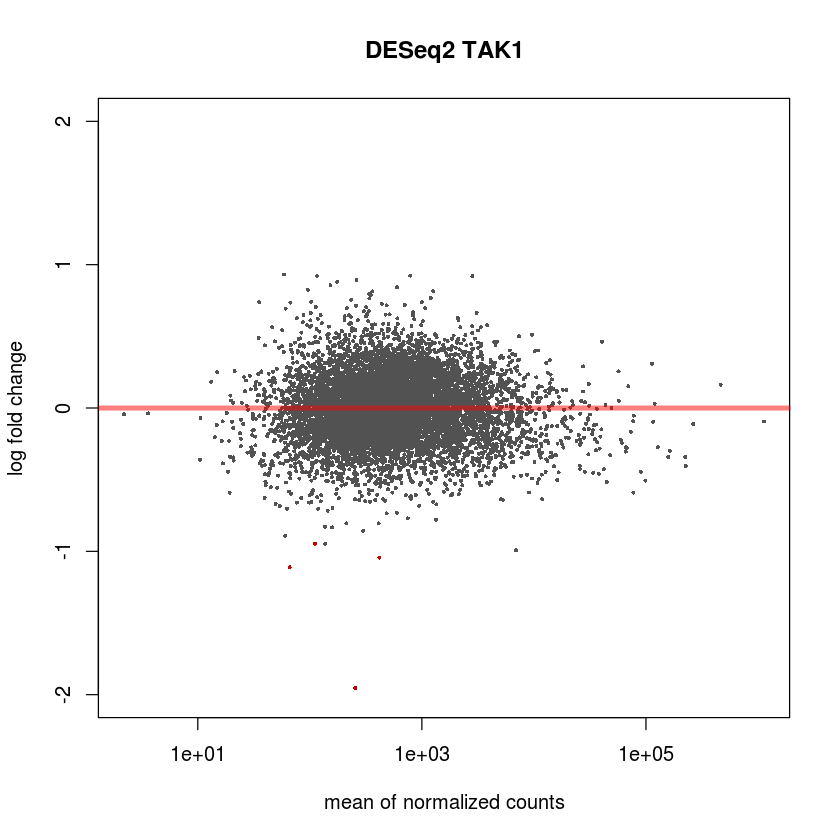

In [119]:
res_tak1 <- results(tak1_dd)
summary(res_tak1)
plotMA(res_tak1, main="DESeq2 TAK1", ylim=c(-2,2))


out of 8902 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 0, 0% 
LFC < 0 (down)   : 4, 0.045% 
outliers [1]     : 59, 0.66% 
low counts [2]   : 0, 0% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



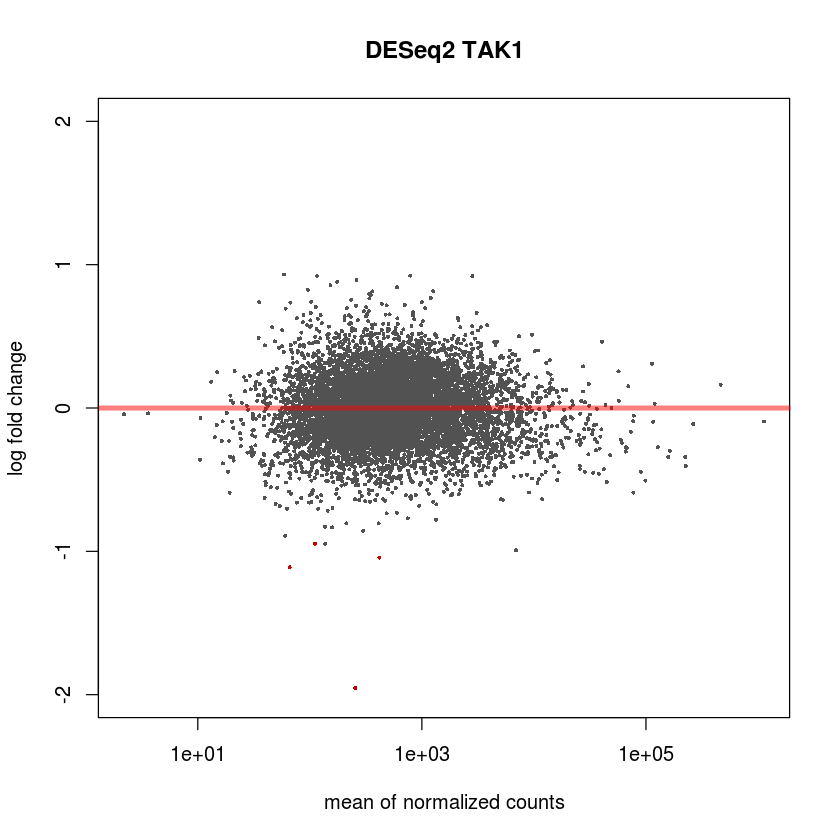

In [117]:
# Test to see if it changes 
# estimates are of log2(treated /untreated); contrast=c("condition","treated","untreated")
res_tak1 <- results(tak1_dd,contrast=c('condition','Low','High'))
summary(res_tak1)
plotMA(res_tak1, main="DESeq2 TAK1", ylim=c(-2,2))

### Split the DEN mice by 'high-corr' and 'low-corr'

In [27]:
head(corr_lv)

strain,sample,Corr_sum,condition
TAK1,AT136_T1_S23,-247.85149,Low
TAK1,AT66_T1_S19,-208.04063,Low
TAK1,AT66_T2_S20,22.65050,High
TAK1,AT81_S22,57.39931,High
TAK1,AT136_T3_S25,84.93241,High
TAK1,AT66_T3_S21,120.54587,High


In [28]:
den_con = corr_lv[which(corr_lv$strain == 'DEN'),]

In [30]:
den_exp = mouse_raw[den_con$sample]

den_exp_n = as.data.frame(sapply(den_exp, as.integer))
rownames(den_exp_n)<- rownames(den_exp)

den_exp_srt <- den_exp_n[,order(names(den_exp_n))]

In [31]:
rownames(den_con) <- den_con$sample

den_con = den_con[order(den_con$sample),]

In [32]:
c(dim(den_con), dim(den_exp_n))

[1]   19    4 8903   19

In [34]:
write.csv(den_exp_n,file='den_expression.csv')

In [72]:
den_con_sub = den_con[which(den_con$Corr_sum > 70|den_con$Corr_sum < -70),]

In [73]:
den_con_sub

,strain,sample,Corr_sum,condition
T19_S12,DEN,T19_S12,120.12459,High
T34_S10,DEN,T34_S10,-75.02380,Low
T58_S13,DEN,T58_S13,73.02134,High
T61_S14,DEN,T61_S14,-106.32796,Low
T67_S16,DEN,T67_S16,143.71952,High
T7_S11,DEN,T7_S11,172.77522,High
T71_S17,DEN,T71_S17,-134.82611,Low
T82_S17,DEN,T82_S17,-263.41582,Low
T86_S18,DEN,T86_S18,-86.45359,Low
T89_S18,DEN,T89_S18,108.35645,High


In [78]:
den_exp_srt_sub = den_exp_srt[as.character(den_con_sub$sample)]

In [79]:
den_dd <- run_deseq(den_exp_srt_sub,den_con_sub,'mouse/den_high_vs_low_sub.csv')

[1] "mouse/den_high_vs_low_sub.csv"


using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing



out of 8901 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 454, 5.1% 
LFC < 0 (down)   : 415, 4.7% 
outliers [1]     : 16, 0.18% 
low counts [2]   : 0, 0% 
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



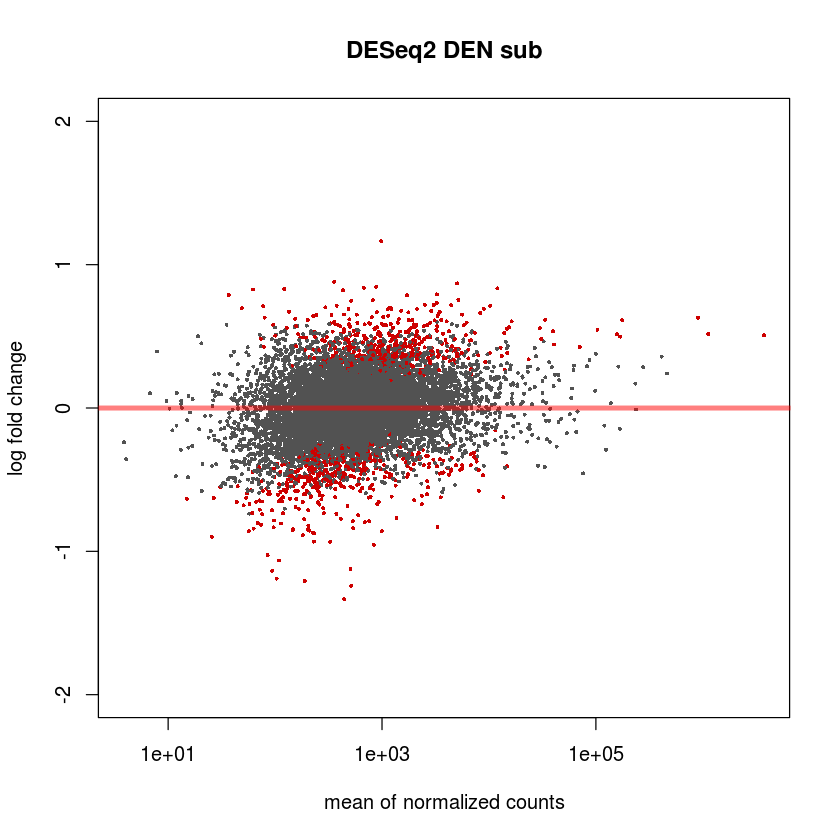

In [80]:
# Test to see if it changes 
# estimates are of log2(treated /untreated); contrast=c("condition","treated","untreated")
res_den <- results(den_dd,contrast=c('condition','Low','High'))
summary(res_den)
plotMA(res_den, main="DESeq2 DEN sub", ylim=c(-2,2))

In [58]:
den_dd <- run_deseq(den_exp_srt,den_con,'mouse/den_high_vs_low.csv')

[1] "mouse/den_high_vs_low.csv"


using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 30 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [59]:
den_dd

class: DESeqDataSet 
dim: 8902 19 
metadata(1): version
assays(5): counts mu cooks replaceCounts replaceCooks
rownames(8902): A1CF AAAS ... ZZEF1 ZZZ3
rowData names(28): baseMean baseVar ... maxCooks replace
colnames(19): T19_S12 T20_S13 ... T92_S19 T93_S20
colData names(6): strain sample ... sizeFactor replaceable

In [61]:
den_con

,strain,sample,Corr_sum,condition
T19_S12,DEN,T19_S12,120.12459,High
T20_S13,DEN,T20_S13,68.55089,High
T30_S14,DEN,T30_S14,-33.87773,Low
T32_S15,DEN,T32_S15,67.85621,High
T34_S10,DEN,T34_S10,-75.02380,Low
T38_S11,DEN,T38_S11,-45.24419,Low
T42_S12,DEN,T42_S12,-66.46212,Low
T58_S13,DEN,T58_S13,73.02134,High
T61_S14,DEN,T61_S14,-106.32796,Low
T62_S15,DEN,T62_S15,18.35139,High



out of 8902 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 136, 1.5% 
LFC < 0 (down)   : 165, 1.9% 
outliers [1]     : 0, 0% 
low counts [2]   : 0, 0% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



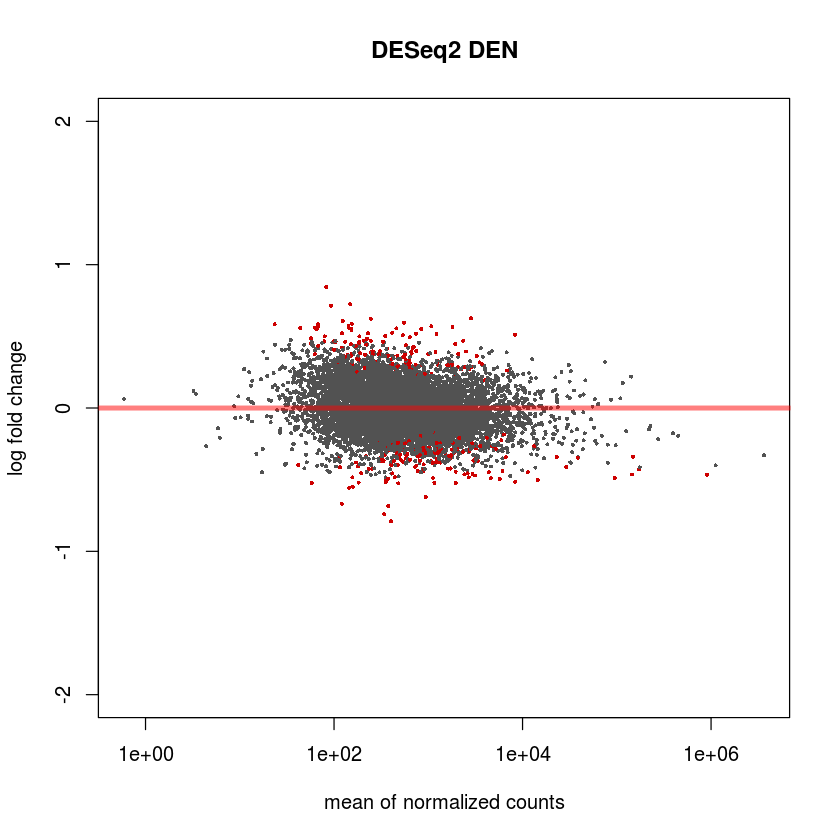

In [62]:
# Test to see if it changes 
# estimates are of log2(treated /untreated); contrast=c("condition","treated","untreated")
res_den <- results(den_dd,contrast=c('condition','High','Low'))
summary(res_den)
plotMA(res_den, main="DESeq2 DEN", ylim=c(-2,2))


out of 8902 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 165, 1.9% 
LFC < 0 (down)   : 136, 1.5% 
outliers [1]     : 0, 0% 
low counts [2]   : 0, 0% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



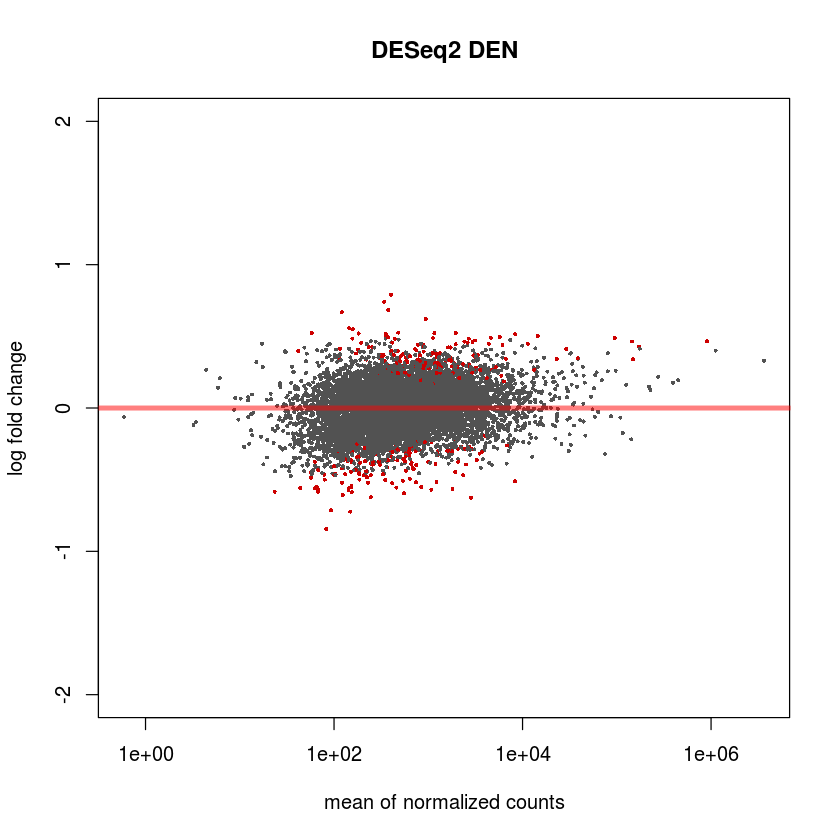

In [257]:
res_den <- results(den_dd,contrast=c('condition','high','low'))
summary(res_den)
plotMA(res_den, main="DESeq2 DEN", ylim=c(-2,2))

### Split the STAM samples by PC1 vs PC2

In [43]:
ctnnb1_mut = read.csv('mouse_ctnnb1_conditions_PCs.csv')
rownames(ctnnb1_mut) <- ctnnb1_mut$RNA_sname

ctnnb1_mut = ctnnb1_mut[order(ctnnb1_mut$RNA_sname),]

In [44]:
stam_exp = mouse_raw[as.character(ctnnb1_mut$RNA_sname)]

stam_exp_n = as.data.frame(sapply(stam_exp, as.integer))
rownames(stam_exp_n)<- rownames(stam_exp)

stam_exp_srt <- stam_exp_n[,order(names(stam_exp_n))]

In [45]:
dim(stam_exp_srt)

[1] 8903   17

In [47]:
colnames(stam_exp_srt)

[1] "J750_T1_S1" "J750T2_S1"  "J755_T1_S2" "J756T1_S2"  "J756T3_S3" 
 [6] "J756T8_S5"  "J757_T1_S3" "J757_T3_S4" "J757_T6_S5" "J757_T7_S6"
[11] "J757T3_S6"  "J758_T1_S7" "J758_T4_S8" "J758T3_S7"  "J759T2_S8" 
[16] "J759T4_S9"  "J759T5_S10"

In [48]:
rownames(ctnnb1_mut)

[1] "J750_T1_S1" "J750T2_S1"  "J755_T1_S2" "J756T1_S2"  "J756T3_S3" 
 [6] "J756T8_S5"  "J757_T1_S3" "J757_T3_S4" "J757_T6_S5" "J757_T7_S6"
[11] "J757T3_S6"  "J758_T1_S7" "J758_T4_S8" "J758T3_S7"  "J759T2_S8" 
[16] "J759T4_S9"  "J759T5_S10"

In [49]:
stam_dd <- run_deseq(stam_exp_srt,ctnnb1_mut,'mouse/stam_PC1_vs_PC2.csv')

[1] "mouse/stam_PC1_vs_PC2.csv"


using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 31 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing



out of 8902 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 875, 9.8% 
LFC < 0 (down)   : 825, 9.3% 
outliers [1]     : 9, 0.1% 
low counts [2]   : 0, 0% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



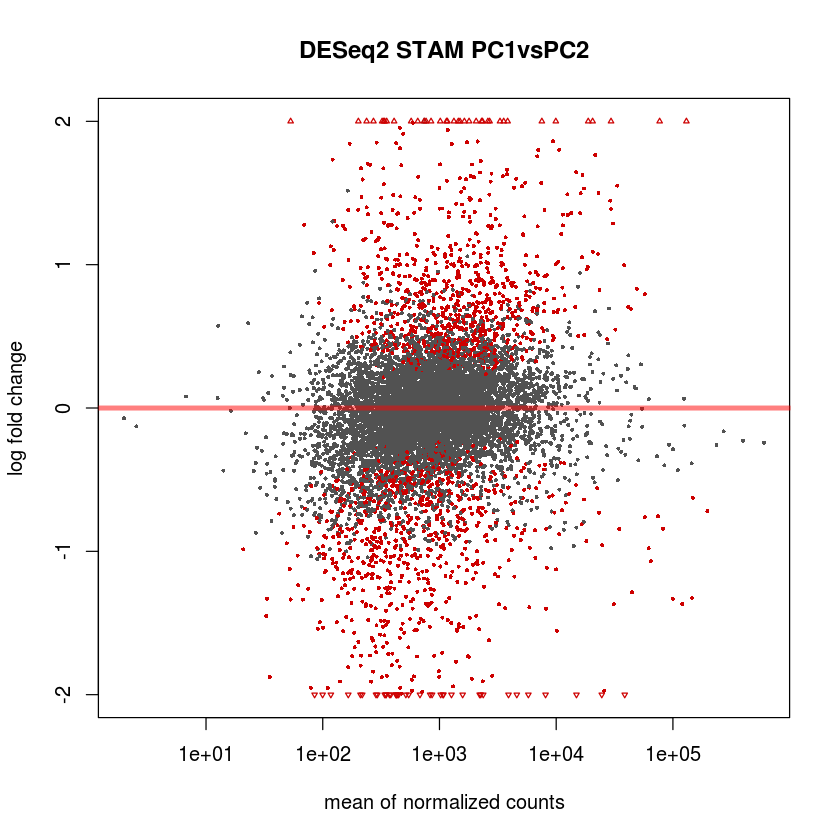

In [83]:
res_stam <- results(stam_dd,contrast=c('condition','PC1','None'))
summary(res_stam)
plotMA(res_stam, main="DESeq2 STAM PC1vsPC2", ylim=c(-2,2))


out of 8902 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 875, 9.8% 
LFC < 0 (down)   : 825, 9.3% 
outliers [1]     : 9, 0.1% 
low counts [2]   : 0, 0% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



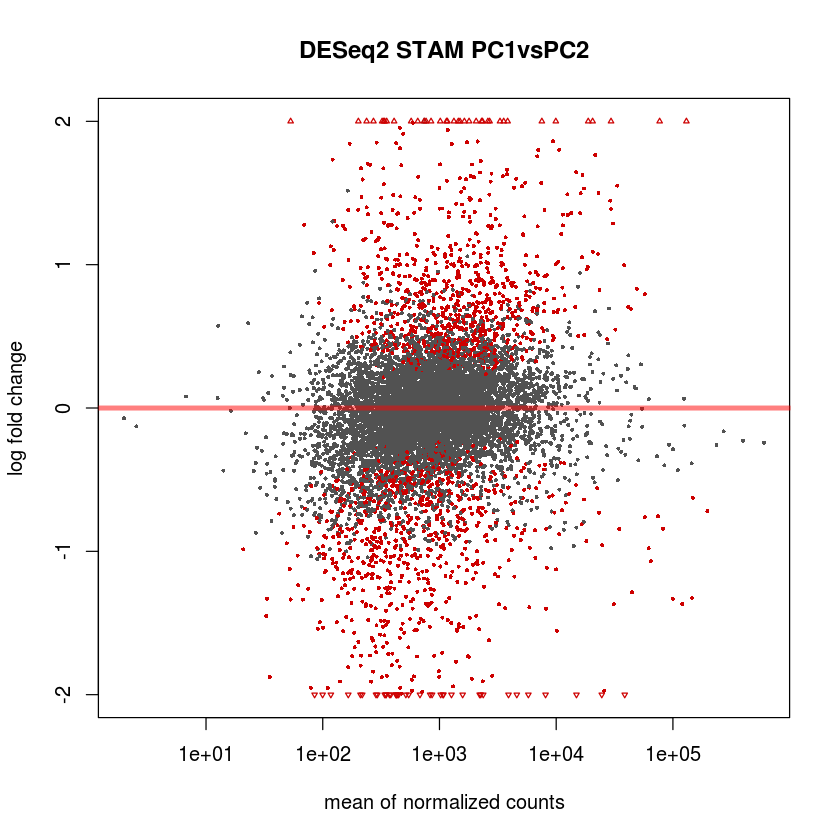

In [50]:
res_stam <- results(stam_dd)
summary(res_stam)
plotMA(res_stam, main="DESeq2 STAM PC1vsPC2", ylim=c(-2,2))

### Split the STAM samples by yes-CTNNB1 and no-CTNNB1

In [84]:
ctnnb1_mut = read.csv('mouse/mouse_ctnnb1_conditions.csv')

rownames(ctnnb1_mut) <- ctnnb1_mut$RNA_sname

ctnnb1_mut = ctnnb1_mut[order(ctnnb1_mut$RNA_sname),]

In [36]:
stam_exp = mouse_raw[as.character(ctnnb1_mut$RNA_sname)]

stam_exp_n = as.data.frame(sapply(stam_exp, as.integer))
rownames(stam_exp_n)<- rownames(stam_exp)

stam_exp_srt <- stam_exp_n[,order(names(stam_exp_n))]

In [37]:
write.csv(stam_exp_n,file='stam_expression.csv')

In [285]:
stam_dd <- run_deseq(stam_exp_srt,ctnnb1_mut,'mouse/stam_mut_vs_none.csv')

[1] "stam_mut_vs_none.csv"


using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 45 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [286]:
stam_dd 

class: DESeqDataSet 
dim: 8902 19 
metadata(1): version
assays(5): counts mu cooks replaceCounts replaceCooks
rownames(8902): A1CF AAAS ... ZZEF1 ZZZ3
rowData names(28): baseMean baseVar ... maxCooks replace
colnames(19): J750_T1_S1 J750T2_S1 ... J759T4_S9 J759T5_S10
colData names(5): MODEL RNA_sname condition sizeFactor replaceable


out of 8902 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 192, 2.2% 
LFC < 0 (down)   : 380, 4.3% 
outliers [1]     : 22, 0.25% 
low counts [2]   : 0, 0% 
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



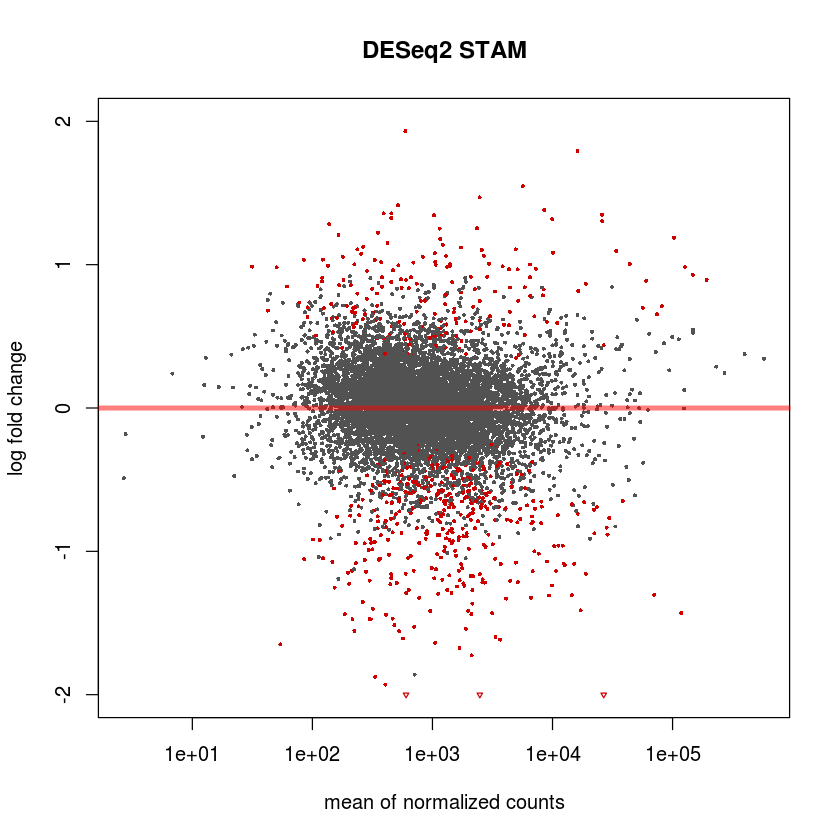

In [287]:
res_stam <- results(stam_dd)
summary(res_stam)
plotMA(res_stam, main="DESeq2 STAM", ylim=c(-2,2))

In [89]:
ctnnb1_mut2 = read.csv('mouse/mouse_ctnnb1_conditions_2.csv')

rownames(ctnnb1_mut2) <- ctnnb1_mut2$RNA_sname

ctnnb1_mut2 = ctnnb1_mut2[order(ctnnb1_mut2$RNA_sname),]

In [94]:
stam_exp = mouse_raw[as.character(ctnnb1_mut$RNA_sname)]

stam_exp_n = as.data.frame(sapply(stam_exp, as.integer))
rownames(stam_exp_n)<- rownames(stam_exp)

stam_exp_srt <- stam_exp_n[,order(names(stam_exp_n))]

dim(stam_exp_srt)

[1] 8903   19

In [95]:
stam_dd <- run_deseq(stam_exp_srt,ctnnb1_mut2,'mouse/stam_mut_S1_vs_S3.csv')

[1] "mouse/stam_mut_S1_vs_S3.csv"


using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 30 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing



out of 8902 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 866, 9.7% 
LFC < 0 (down)   : 844, 9.5% 
outliers [1]     : 8, 0.09% 
low counts [2]   : 0, 0% 
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



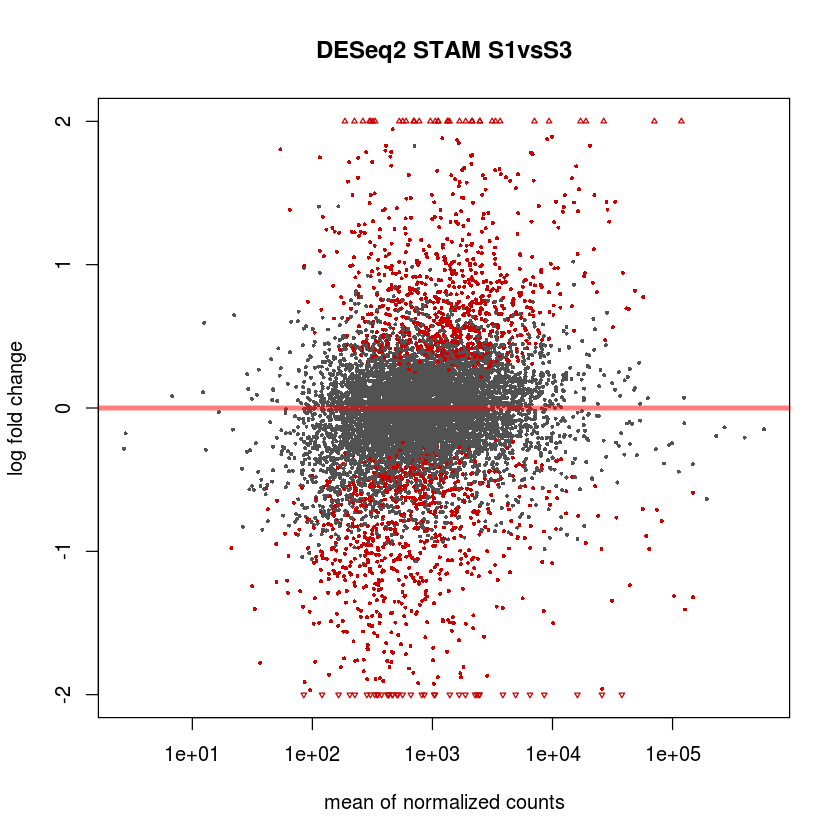

In [104]:
res_stam <- results(stam_dd,contrast=c('condition','Mut','None'))
summary(res_stam)
plotMA(res_stam, main="DESeq2 STAM S1vsS3", ylim=c(-2,2))

In [105]:

write.csv(as.data.frame(res_stam),file='mouse/stam_mut_S1_vs_S3.csv')

In [107]:
getwd()

[1] "/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis"

## =====

## HUMAN

In [141]:
getwd()

[1] "/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis"

In [133]:
indir='human/'
groups_ls = c( 'HCC_vs_normal.csv','S1_vs_normal.csv','S2_vs_normal.csv', 'S3_vs_normal.csv',
 'Hoshida_C1_vs_normal.csv', 'Hoshida_C2_vs_normal.csv', 'Hoshida_C3_vs_normal.csv')
infname = paste(indir,'Hoshida_C1_vs_normal.csv',sep='')
test <- read.csv(infname,row.names=1)

In [137]:
for (c in groups_ls){
    infname = paste(indir,c,sep='')
    test <- read.csv(infname,row.names=1)
    print(head(test))
}


     PID.1 condition
4072  4072     tumor
4073  4073     tumor
5258  5258     tumor
5260  5260     tumor
5261  5261     tumor
5262  5262     tumor
     PID.1 condition
4072  4072        S1
4073  4073        S1
5258  5258        S1
5260  5260        S1
5261  5261        S1
5262  5262        S1
     PID.1 condition
4072  4072    normal
4073  4073    normal
5258  5258    normal
5260  5260    normal
5261  5261    normal
5262  5262    normal
     PID.1 condition
4072  4072    normal
4073  4073    normal
5258  5258    normal
5260  5260    normal
5261  5261    normal
5262  5262    normal
     PID.1 condition
4072  4072    normal
4073  4073    normal
5258  5258    normal
5260  5260    normal
5261  5261    normal
5262  5262    normal
     PID.1  condition
4072  4072 Hoshida_C2
4073  4073 Hoshida_C2
5258  5258 Hoshida_C2
5260  5260 Hoshida_C2
5261  5261 Hoshida_C2
5262  5262 Hoshida_C2
     PID.1 condition
4072  4072    normal
4073  4073    normal
5258  5258    normal
5260  5260    normal
5261  

In [140]:
unique(test$condition)[unique(test$condition) != 'normal']

[1] Hoshida_C3
Levels: Hoshida_C3 normal

In [160]:
head(test)

,PID.1,condition
4072,4072,normal
4073,4073,normal
5258,5258,normal
5260,5260,normal
5261,5261,normal
5262,5262,normal


In [162]:
# Load expression data
indir='/cellar/users/mdow/Projects/HCC/RNA_analysis/'
exp_indir = paste(indir,'tcga_all_rawcounts.csv',sep='')
exp_df = read.csv(exp_indir,check.names=FALSE,row.names=1)
print(dim(exp_df))

#exp_df_n = as.data.frame(sapply(exp_df, as.integer))

exp_df_n = as.data.frame(sapply(exp_df, as.integer))
rownames(exp_df_n) <- rownames(exp_df)

print(dim(exp_df_n))

[1] 9175  236
[1] 9175  236


In [164]:
head(exp_df_n)

,4072,4073,5258,5260,5261,5262,5263,5264,a10q_n,a10r,⋯,a7mf,a7px,a7py,a7pz,a7s9,a7sb,a7sf,a7sk,a7xp,a82e
a1cf,0,0,9031,146,1296,1886,5404,8004,2969,3642,⋯,1355,688,2115,2901,1306,2958,2417,2531,4627,7
aaas,0,0,2054,1100,894,1203,1936,2677,670,1100,⋯,2111,2271,844,4517,1381,1516,1070,1795,1176,1844
aacs,0,0,3308,1828,779,720,1713,1738,166,833,⋯,2158,2649,161,493,893,246,268,398,794,1767
aadac,0,0,5014,22,5842,16538,5372,2870,12209,44042,⋯,3210,909,4669,4501,6216,24838,5274,12267,18380,16
aadat,0,0,190,57,85,281,120,132,1769,11,⋯,113,88,6,183,80,576,75,157,89,57
aaed1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [170]:
test_srt = test[order(rownames(test)),]

exp_srt = exp_df_n[,order(colnames(exp_df_n))]

In [191]:
test_cond = test_srt[0:6,]

test_exp = exp_srt[0:50,0:6]

In [204]:

this_infname = '/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis/human/S2_vs_normal.csv'
condDf = read.csv(this_infname,check.names=FALSE,row.names=1)
print(dim(condDf)) 
print(head(condDf)) 
                 
condDf_srt = condDf[order(rownames(condDf)),]

[1] 236   2
      PID condition
4072 4072    normal
4073 4073    normal
5258 5258    normal
5260 5260    normal
5261 5261    normal
5262 5262    normal


In [217]:
head(condDf_srt)

groups = unique(condDf_srt$condition)
test_group= groups[groups != 'normal']

,PID,condition
4072,4072,normal
4073,4073,normal
5258,5258,normal
5260,5260,normal
5261,5261,normal
5262,5262,normal


In [233]:
run_deseq <- function(exp_df,cond_df,fname){
    dds <- DESeqDataSetFromMatrix(countData = exp_df, colData = cond_df, design = ~ condition)
    # Eliminate rows with low expression and columns with all 0s
    x = 10
    dds <- dds[rowSums(counts(dds)) > x, colSums(counts(dds)) > 0]
    
    cts <- counts(dds)
    geoMeans <- apply(cts, 1, function(row) if (all(row == 0)) 0 else exp(mean(log(row[row != 0]))))
    dds <- estimateSizeFactors(dds, geoMeans=geoMeans)

    dds <- DESeq(dds)

    groups = unique(cond_df$condition)
    test_group= as.character(groups[groups != 'normal'])
    #print(groups)
    print(test_group)
    res <- results(dds,contrast=c('condition',test_group,'normal'))
    write.csv(as.data.frame(res), file=fname)

    return(dds)
}

In [230]:
test_exp = exp_srt[0:50,0:12]
test_cond = condDf_srt[0:12,]

In [234]:
dd_test <- run_deseq(test_exp,test_cond,'test')

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 5 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


[1] "S2"


## Test for proliferation

In [24]:
# Load expression data
human_raw = read.csv('/cellar/users/mdow/Projects/HCC/RNA_analysis/tcga_iClust_rawcounts.csv',row.names=1,check.names=FALSE)

# Load grouping data

myClust = read.csv('human/prolif_cond.csv',row.names=1)
colnames(myClust) = c('PID','condition')

In [40]:
unique(myClust$condition)

[1] high_prolif low_prolif 
Levels: high_prolif low_prolif

In [30]:
# Sort tables

human_srt <- human_raw[,order(names(human_raw))]
human_srt_n = as.data.frame(sapply(human_srt, as.integer))
rownames(human_srt_n) <- rownames(human_srt)

myClust_srt <- myClust[order(myClust$PID),]


In [31]:
head(myClust_srt)

,PID,condition
4072,4072,high_prolif
4073,4073,high_prolif
5258,5258,high_prolif
5260,5260,high_prolif
5261,5261,high_prolif
5262,5262,high_prolif


In [21]:
test_exp = head(human_srt_n)

In [32]:
test_cond = head(myClust_srt)

In [20]:
run_deseq <- function(exp_df,cond_df,fname){
    print(fname)
    dds <- DESeqDataSetFromMatrix(countData = exp_df, colData = cond_df, design = ~ condition)
    # Eliminate rows with low expression and columns with all 0s
    x = 10
    dds <- dds[rowSums(counts(dds)) > x, colSums(counts(dds)) > 0]
    
    cts <- counts(dds)
    geoMeans <- apply(cts, 1, function(row) if (all(row == 0)) 0 else exp(mean(log(row[row != 0]))))
    dds <- estimateSizeFactors(dds, geoMeans=geoMeans)

    dds <- DESeq(dds)
    
    res <- results(dds)
    write.csv(as.data.frame(res), file=fname)

    return(dds)
}



In [33]:
dd <- run_deseq(test_exp,myClust_srt,'prolif_test.csv')
print('Done Prolif')

[1] "prolif_test.csv"


using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


[1] "Done Prolif"


## This step is long so run on cluster

In [16]:
#dd_12 <- run_deseq(df12,cond12,'group1_vs_2.csv')

[1] "group1_vs_2.csv"


the design formula contains a numeric variable with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function


## Load the results
### ... actually check them on python

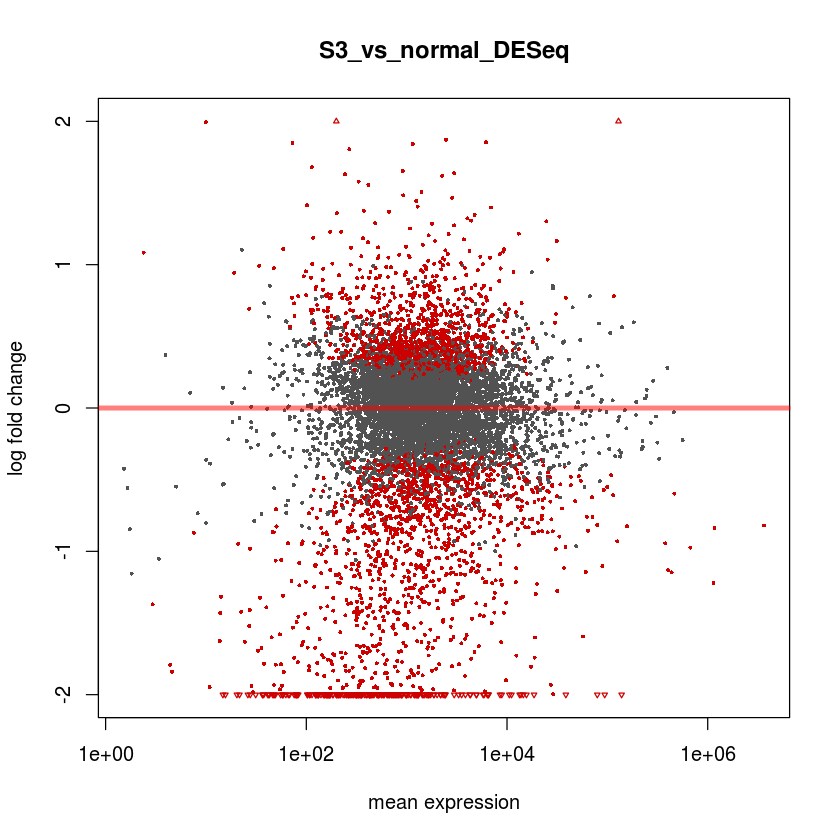

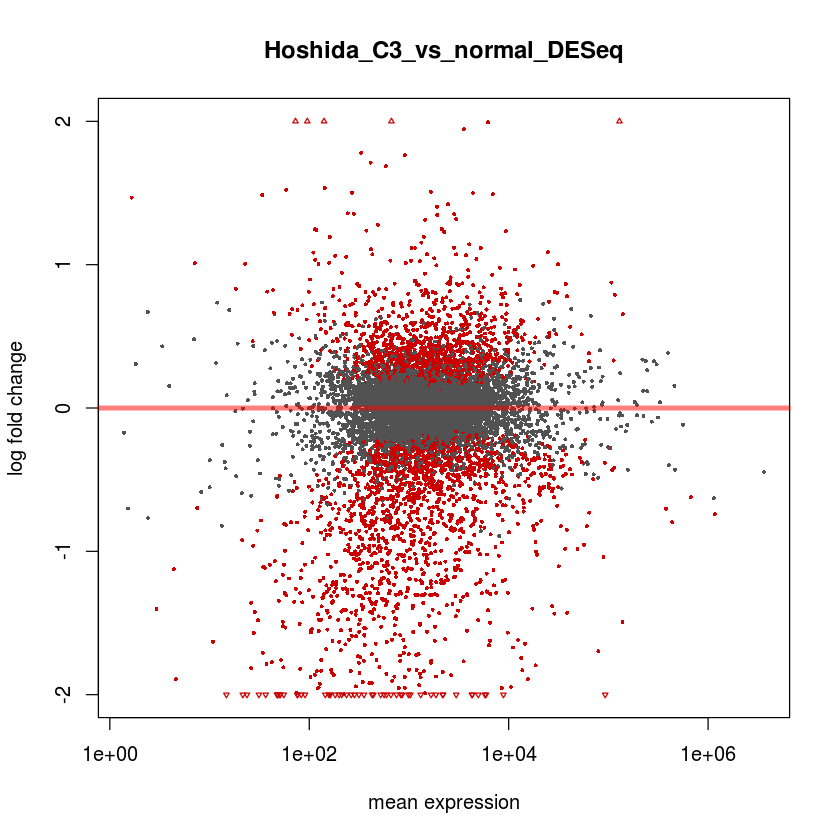

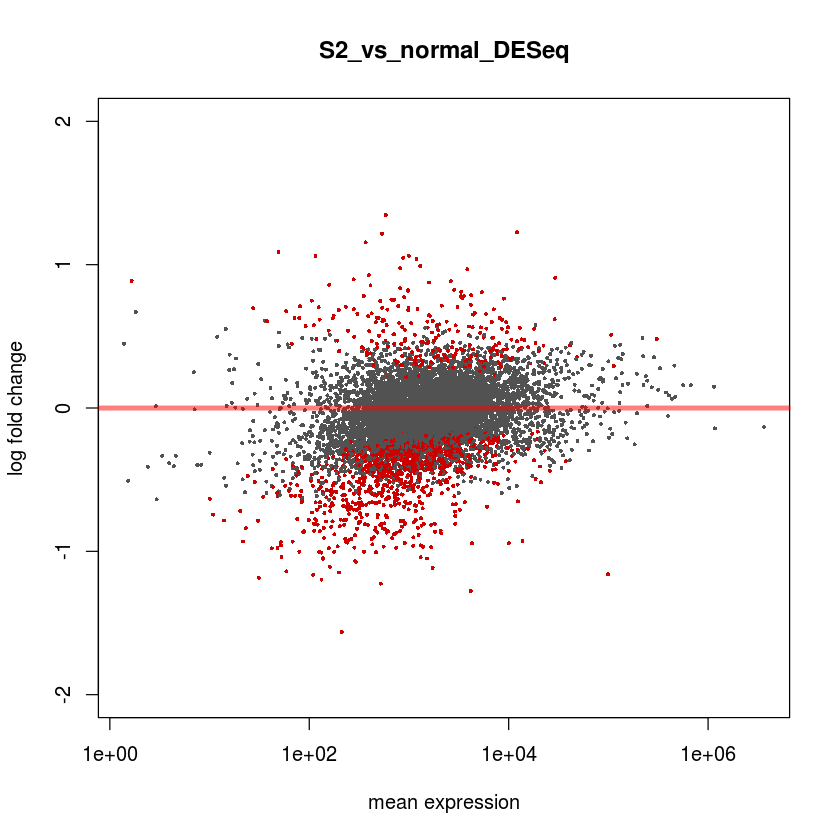

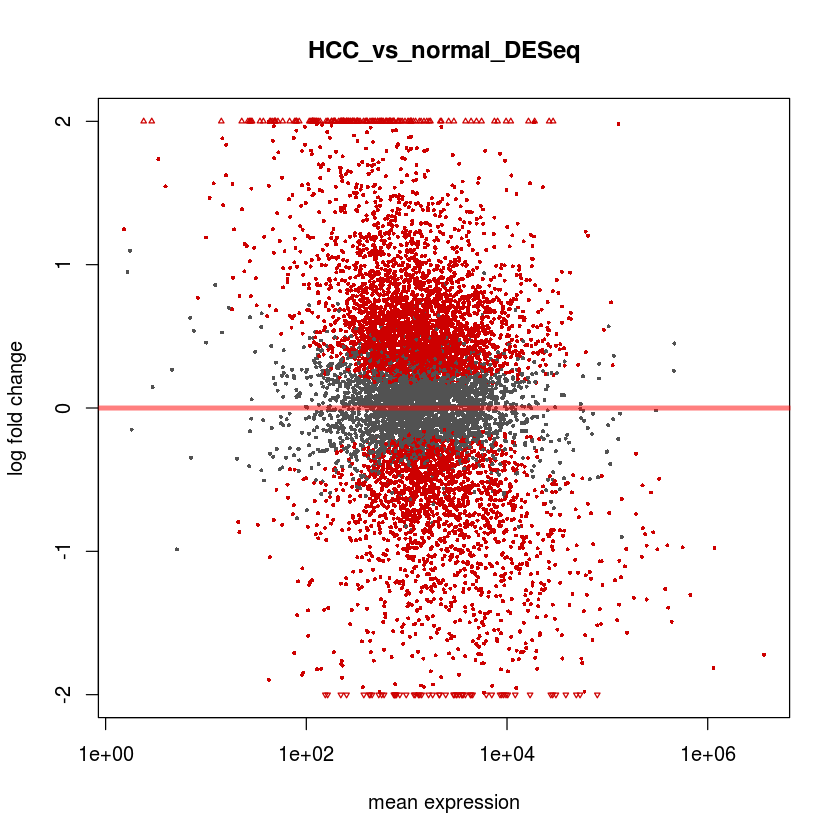

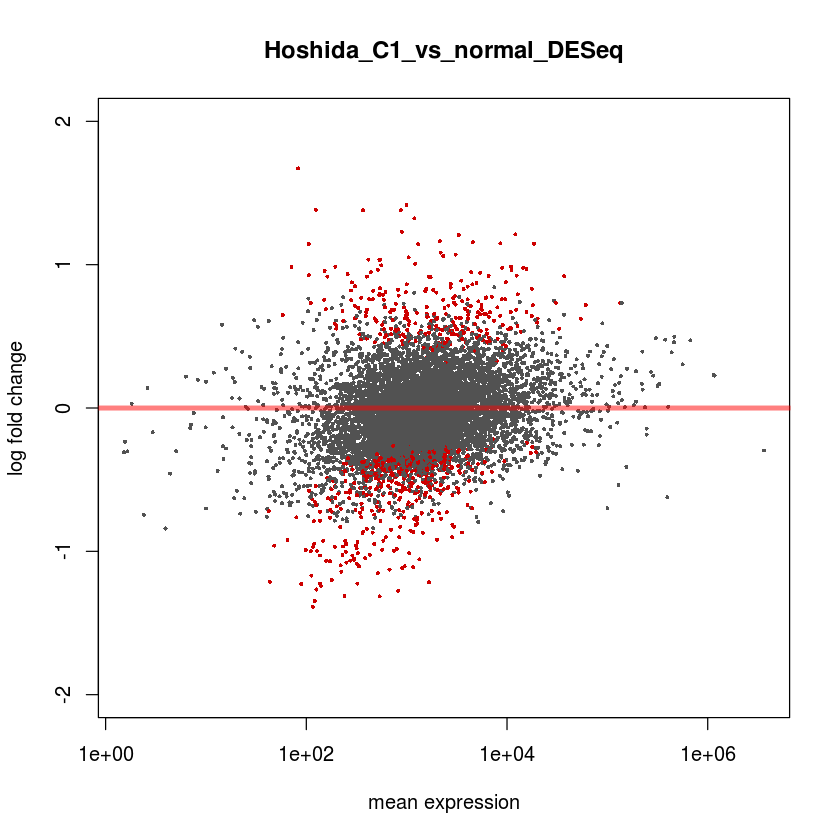

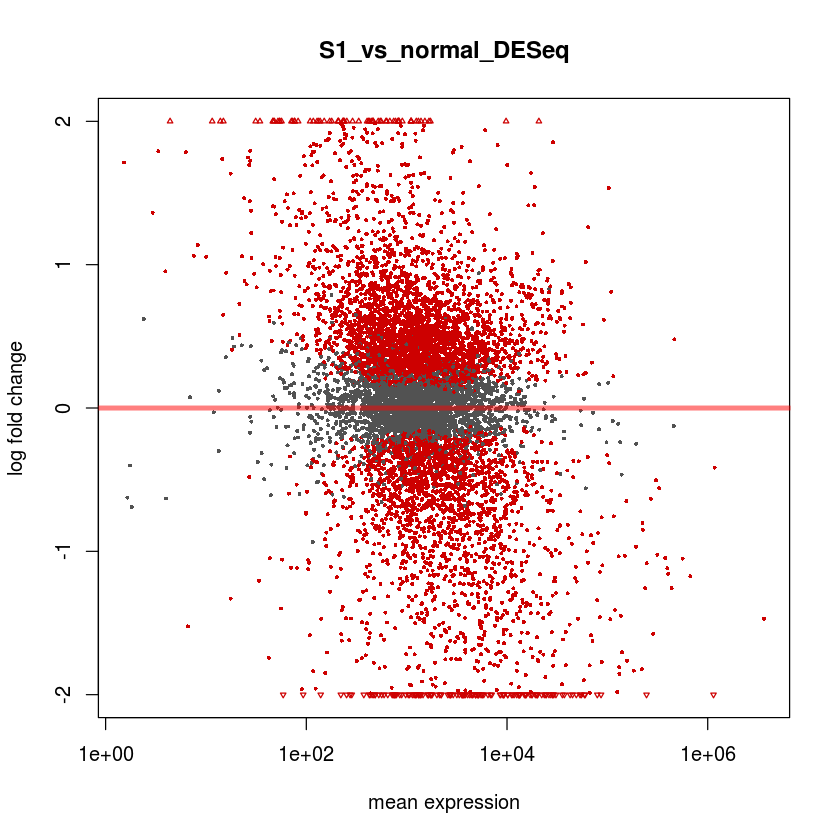

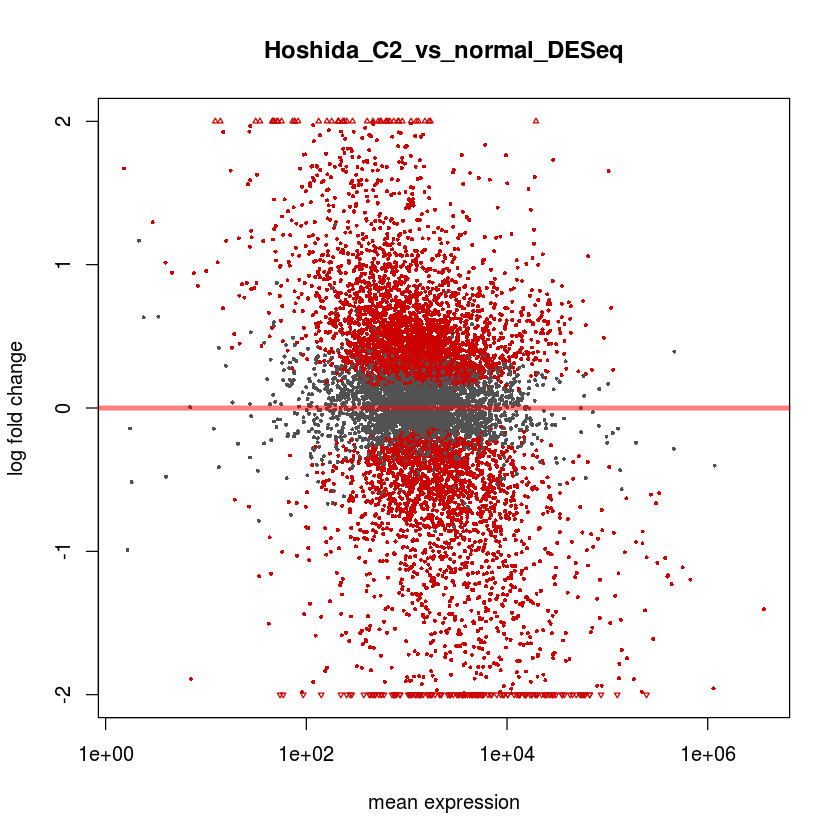

In [239]:
human_out = c('S3_vs_normal_DESeq.csv',
 'Hoshida_C3_vs_normal_DESeq.csv',
 'S2_vs_normal_DESeq.csv',
 'HCC_vs_normal_DESeq.csv',
 'Hoshida_C1_vs_normal_DESeq.csv',
 'S1_vs_normal_DESeq.csv',
 'Hoshida_C2_vs_normal_DESeq.csv')
for (f in human_out){
        plot_ma_res(f)
}



In [140]:
test <- read.csv('group1_vs_2.csv',row.names=1)
test_n = as.data.frame(sapply(test, as.numeric))
rownames(test_n)<- rownames(test)

In [143]:
dim(test)

[1] 8528    6

In [36]:
plot_ma_res <- function(fname){
    test <- read.csv(fname,row.names=1)
    test_n = as.data.frame(sapply(test, as.numeric))
    rownames(test_n)<- rownames(test)
    sigP = 0.01
    test_plotDf <- data.frame('baseMean' =test_n$baseMean,
                         'log2FoldChange' =test_n$log2FoldChange,
                          'psig' =test_n$padj < sigP)
    
    plotFname = strsplit(fname,'[.]')[[1]][1]
    plotMA(test_plotDf, main=plotFname, ylim=c(-2,2))
    
}


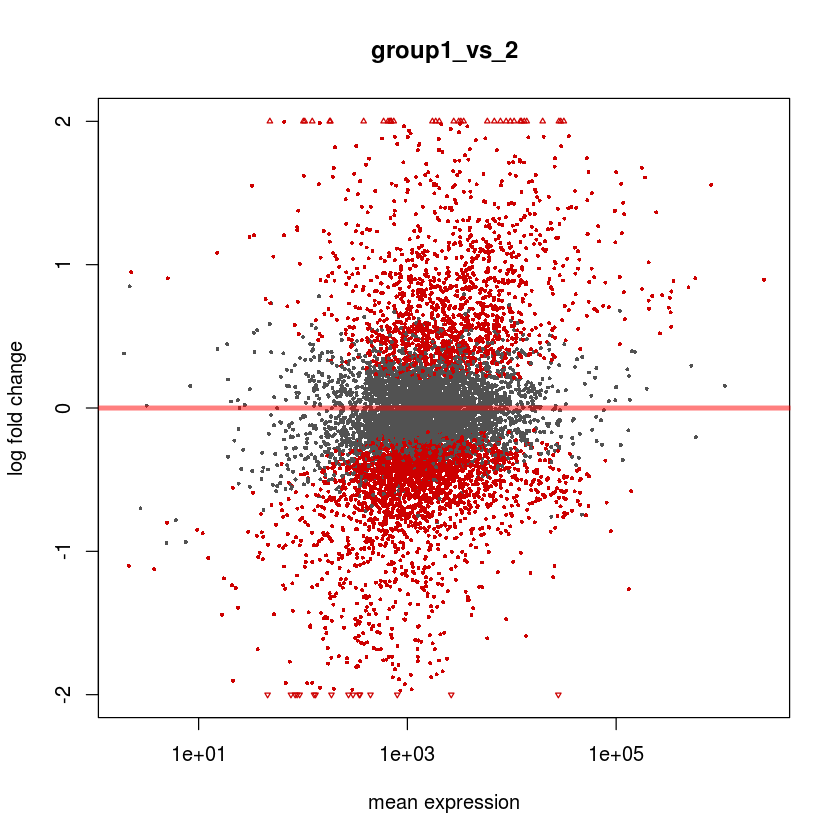

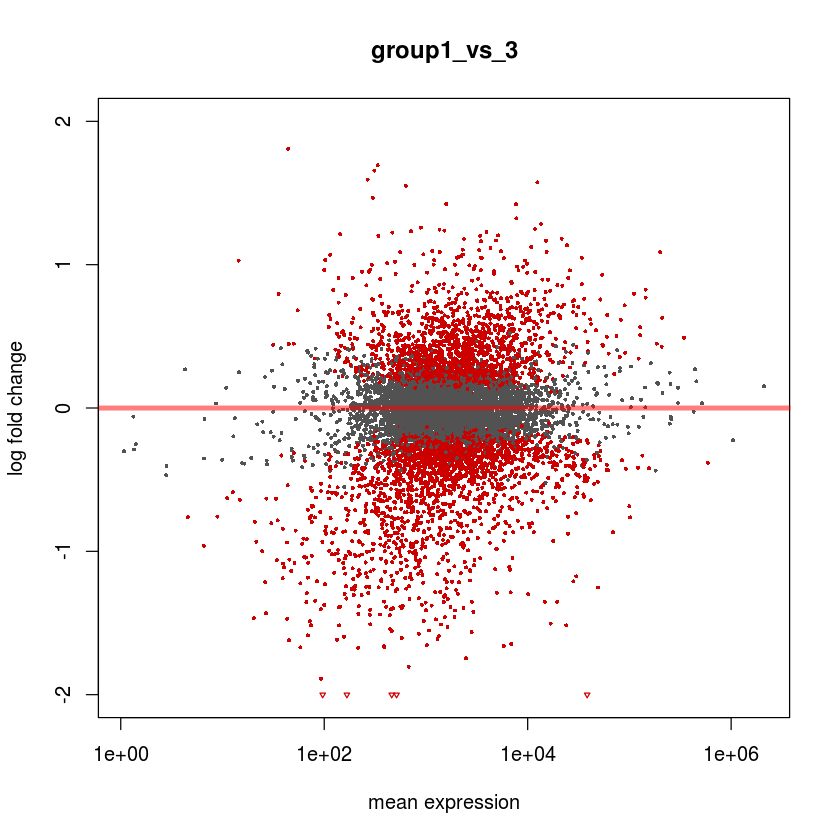

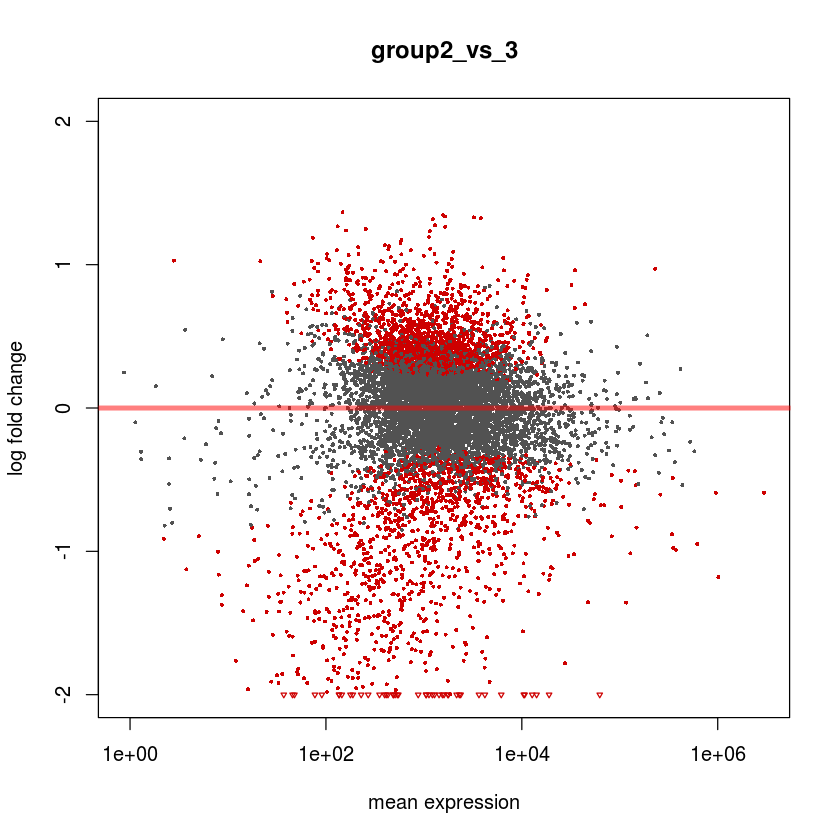

In [151]:
for (f in c('group1_vs_2.csv','group1_vs_3.csv','group2_vs_3.csv')){
    plot_ma_res(f)
}

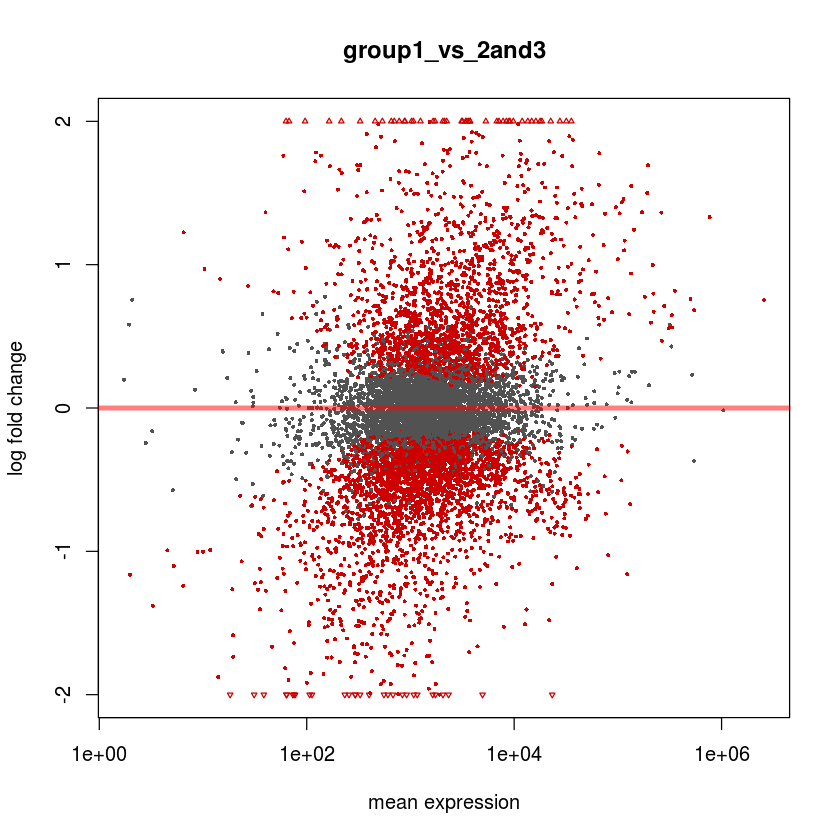

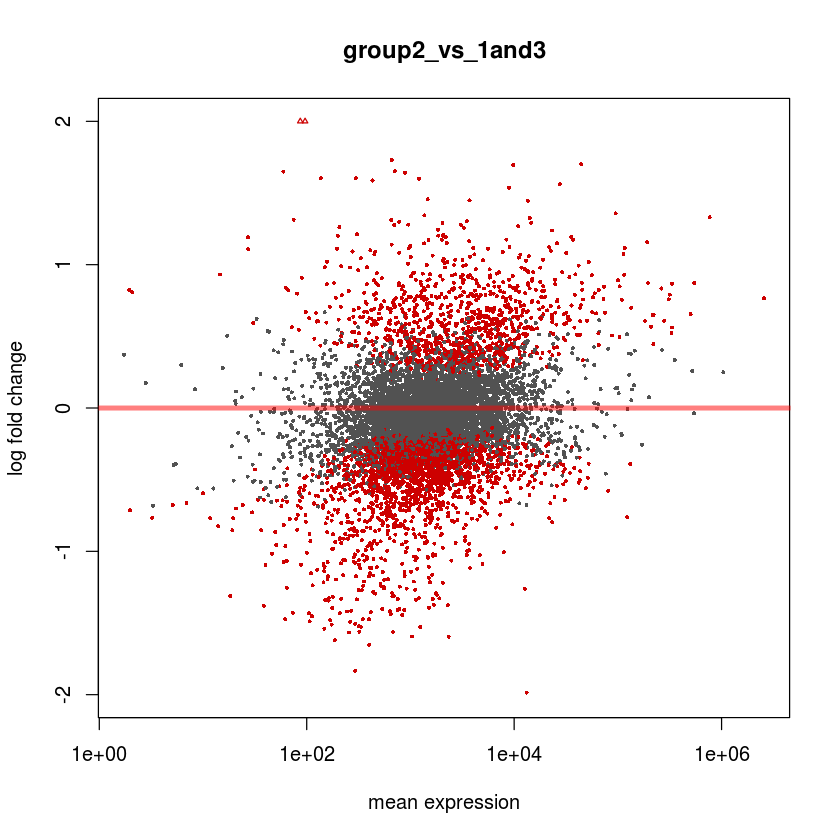

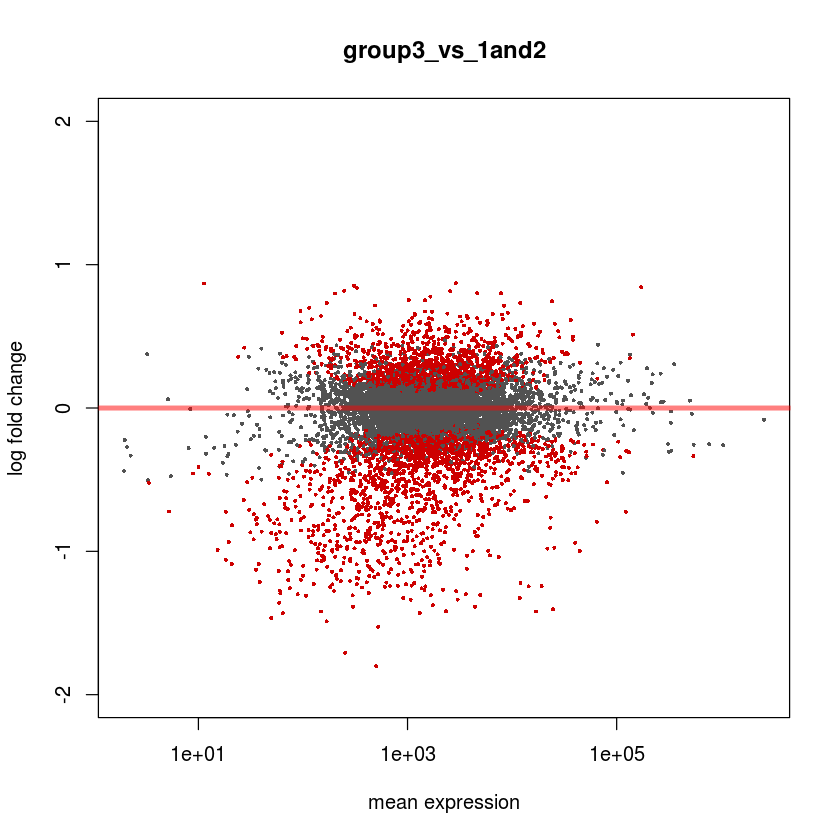

In [196]:
for (f in c('group1_vs_2and3.csv','group2_vs_1and3.csv', 'group3_vs_1and2.csv')){
    plot_ma_res(f)
}

## Proliferative and non-proliferative human

In [43]:
f='prolif_high_vs_low.csv'

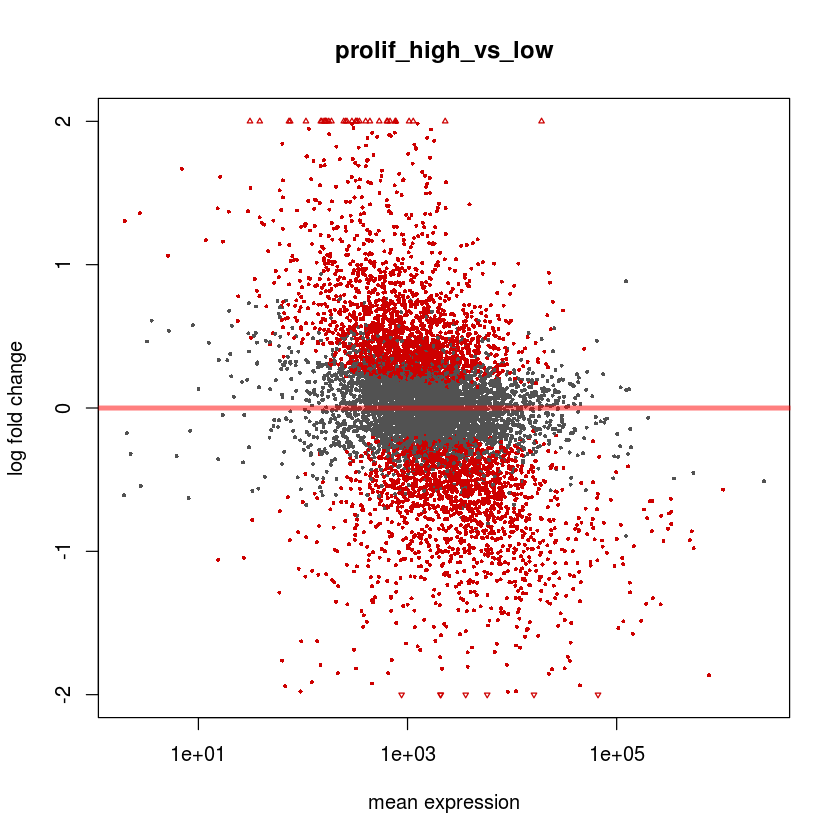

In [44]:
plot_ma_res(f)

In [41]:
prol_out = read.csv('prolif_high_vs_low.csv')

In [42]:
head(prol_out)

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
a1cf,2766.1261,-0.1710692,0.14218472,-1.203148,2.289192e-01,3.036117e-01
aaas,1573.7959,0.1159359,0.06528522,1.775838,7.575967e-02,1.187677e-01
aacs,805.3053,0.6067141,0.12071050,5.026191,5.003163e-07,2.831252e-06
aadac,13298.3835,-1.2023180,0.18987105,-6.332287,2.415534e-10,2.724824e-09
aadat,378.4748,-0.7121205,0.21617465,-3.294190,9.870562e-04,2.593227e-03
aagab,1310.1174,0.1007001,0.05714705,1.762122,7.804869e-02,1.218377e-01
